In [1]:
import librosa
import librosa.display
from spectrogram_class import spectrogram
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from spec_input_generator import gen, gen_eval
import numpy as np

../data/_OrchideaSOL2020_release/OrchideaSOL2020/


In [2]:
hop_length = 2048
win_length = 512
n_fft = 1024

/home/shiya/anaconda3/envs/music/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/home/shiya/Documents/Music_transcription_fastai/notebooks/spectrogram_class.py:111: FutureWarning: Pass y=[ 0.02256311 -0.00628014  0.02942192 ... -0.06424806 -0.00418399
  0.03520877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.spec = librosa.feature.melspectrogram(self.signal, n_mels = 256, hop_length=self.hop, n_fft=self.n_fft)


mel: (256, 404)
(256, 500)
(256, 500) HIT


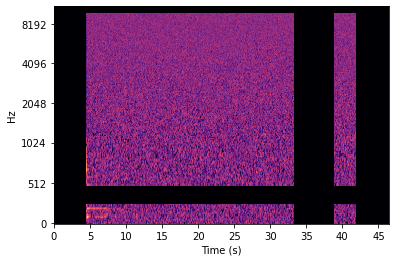

In [3]:
%run spectrogram_class.py

In [4]:
meta_df = pd.read_csv('../data/OrchideaSOL_metadata.csv')

In [5]:
meta_df.sample(1)['Path'].values[0]

'Strings/Viola/ordinario/Va-ord-A4-ff-3c-R100d.wav'

In [6]:
test_spec = spectrogram(meta_df.sample(1)['Path'].values[0])

/home/shiya/anaconda3/envs/music/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


mel: (256, 215)


/home/shiya/Documents/Music_transcription_fastai/notebooks/spectrogram_class.py:111: FutureWarning: Pass y=[ 0.001606   -0.00043894  0.00211523 ...  0.00360027  0.00333699
  0.00300451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.spec = librosa.feature.melspectrogram(self.signal, n_mels = 256, hop_length=self.hop, n_fft=self.n_fft)


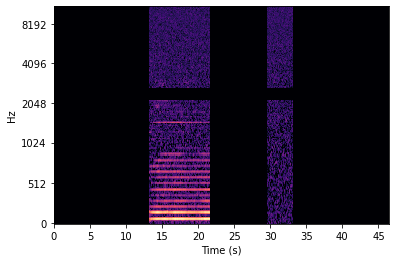

In [7]:
test_spec.plot_spec()

In [8]:
test, _ = librosa.load('../data/_OrchideaSOL2020_release/OrchideaSOL2020/PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', 
                    sr = None)

In [9]:
test.shape

(826215,)

In [10]:
def mask_spec(arr, inplace = False):
    loop = random.randint(1, 2)
    tmp = arr.copy()
    for i in range(loop):
        start = random.randint(0, arr.shape[1])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[:, start:start + duration] = 0
        else:
            tmp[:, start:start+duration] = 0
    freq_loop = random.randint(1, 3)
    for freq in range(freq_loop):
        start = random.randint(0, arr.shape[0])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[start:start + duration, :] = 0
        else:
            tmp[start:start + duration, :] = 0

    return None if inplace == True else tmp


In [11]:
# librosa.display.specshow(librosa.amplitude_to_db(mask_spec(spec_sample)), y_axis='log', x_axis = 's')

In [12]:
import random
print(random.randint(0, 9))

3


In [18]:
print(random.randint.__doc__)

Return random integer in range [a, b], including both end points.
        


In [19]:
test, _ = next(gen(meta_df))

mel: (256, 428)


/home/shiya/Documents/Music_transcription_fastai/notebooks/spectrogram_class.py:111: FutureWarning: Pass y=[ 0.00036369 -0.00010255  0.00047125 ...  0.00087924 -0.00062641
 -0.00038162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.spec = librosa.feature.melspectrogram(self.signal, n_mels = 256, hop_length=self.hop, n_fft=self.n_fft)


In [20]:
0 in test

True

In [21]:
print(test.shape)

(256, 500, 1)


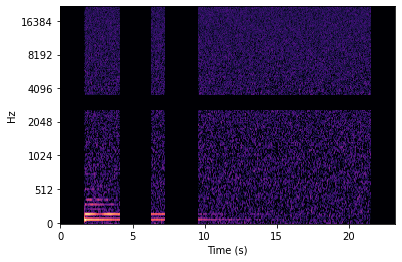

In [22]:
librosa.display.specshow(librosa.amplitude_to_db(np.reshape(test, newshape = test.shape[:2])), x_axis = 's', 
                                                y_axis = 'mel', sr=44100, hop_length=2048, 
                                                n_fft=2048)